### Assessing Petrelli (2021) relative to python files
- Because scipy versions affect the results, we have 2 versions of each algorithm, one uses onnx to always return the same result, one uses the current version of scipy to get voting.

In [1]:
import Thermobar as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Test dataset
out_test=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')

my_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Liq_test=out_test['Liqs']

In [3]:
T_py=pt.calculate_cpx_only_temp(cpx_comps=Cpx_test, 
                        equationT="T_Petrelli2020_Cpx_only_onnx")            



In [4]:
T_py=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test, 
                        equationT="T_Petrelli2020_Cpx_only_onnx",
                         equationP="P_Petrelli2020_Cpx_only")            
T_py


Youve selected a P-independent function
Youve selected a T-independent function
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,P_kbar_calc,T_K_calc,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,3.828456,1193.359863,50.30,1.38,2.25,12.90,1.04,10.10,20.40,1.66,0.0,0.00,0
1,4.877369,1219.543213,50.50,1.00,1.65,13.10,1.11,10.70,21.30,0.71,0.0,0.00,1
2,4.163167,1106.043091,50.60,0.96,2.13,14.90,1.30,7.20,19.90,1.70,0.3,0.00,2
3,10.247340,1421.136963,48.60,0.89,9.06,7.61,0.20,14.80,18.30,0.59,0.0,0.11,3
4,10.772167,1396.871338,48.10,1.03,9.28,8.23,0.20,14.40,18.10,0.65,0.0,0.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2.539836,1377.170288,54.20,0.31,1.98,11.40,0.00,16.60,16.90,0.33,0.0,0.00,114
115,5.166028,1470.411255,55.60,0.19,2.13,13.80,0.00,26.30,4.23,0.07,0.0,0.00,115
116,4.341547,1363.161133,50.80,0.10,2.60,12.30,0.00,11.70,21.70,0.80,0.0,0.00,116
117,23.290000,1558.198730,49.53,0.53,11.83,6.01,0.00,12.89,16.67,2.02,0.0,0.00,117


In [5]:
T_py=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test, 
                        equationT="T_Petrelli2020_Cpx_only",
                         equationP="P_Petrelli2020_Cpx_only")            
T_py


Youve selected a P-independent function
Youve selected a T-independent function
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,P_kbar_calc,T_K_calc,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,3.828456,1193.360000,50.30,1.38,2.25,12.90,1.04,10.10,20.40,1.66,0.0,0.00,0
1,4.877369,1219.543333,50.50,1.00,1.65,13.10,1.11,10.70,21.30,0.71,0.0,0.00,1
2,4.163167,1106.043333,50.60,0.96,2.13,14.90,1.30,7.20,19.90,1.70,0.3,0.00,2
3,10.247340,1421.136667,48.60,0.89,9.06,7.61,0.20,14.80,18.30,0.59,0.0,0.11,3
4,10.772167,1396.871111,48.10,1.03,9.28,8.23,0.20,14.40,18.10,0.65,0.0,0.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2.539836,1377.170000,54.20,0.31,1.98,11.40,0.00,16.60,16.90,0.33,0.0,0.00,114
115,5.166028,1470.411111,55.60,0.19,2.13,13.80,0.00,26.30,4.23,0.07,0.0,0.00,115
116,4.341547,1363.161111,50.80,0.10,2.60,12.30,0.00,11.70,21.70,0.80,0.0,0.00,116
117,23.290000,1558.198889,49.53,0.53,11.83,6.01,0.00,12.89,16.67,2.02,0.0,0.00,117


In [4]:
T_py=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test, 
                        equationT="T_Petrelli2020_Cpx_only_onnx",
                         equationP="P_Petrelli2020_Cpx_only_onnx")            
T_py


Youve selected a P-independent function
Youve selected a T-independent function
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,P_kbar_calc,T_K_calc,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,3.828456,1193.359863,50.30,1.38,2.25,12.90,1.04,10.10,20.40,1.66,0.0,0.00,0
1,4.877371,1219.543213,50.50,1.00,1.65,13.10,1.11,10.70,21.30,0.71,0.0,0.00,1
2,4.163168,1106.043091,50.60,0.96,2.13,14.90,1.30,7.20,19.90,1.70,0.3,0.00,2
3,10.247349,1421.136963,48.60,0.89,9.06,7.61,0.20,14.80,18.30,0.59,0.0,0.11,3
4,10.772173,1396.871338,48.10,1.03,9.28,8.23,0.20,14.40,18.10,0.65,0.0,0.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2.539836,1377.170288,54.20,0.31,1.98,11.40,0.00,16.60,16.90,0.33,0.0,0.00,114
115,5.166030,1470.411255,55.60,0.19,2.13,13.80,0.00,26.30,4.23,0.07,0.0,0.00,115
116,4.341547,1363.161133,50.80,0.10,2.60,12.30,0.00,11.70,21.70,0.80,0.0,0.00,116
117,23.290005,1558.198730,49.53,0.53,11.83,6.01,0.00,12.89,16.67,2.02,0.0,0.00,117


In [ ]:
T_py=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                        equationT="T_Petrelli2020_Cpx_Liq_onnx")
T_py


array([[1196.9683],
       [1183.2246],
       [1114.8552],
       [1411.0652],
       [1393.4545],
       [1371.2094],
       [1292.1019],
       [1337.8269],
       [1302.9558],
       [1472.6262],
       [1416.6398],
       [1283.6448],
       [1265.1212],
       [1350.562 ],
       [1273.9147],
       [1404.64  ],
       [1335.7561],
       [1283.8402],
       [1283.7893],
       [1325.5369],
       [1395.7087],
       [1299.801 ],
       [1345.558 ],
       [1105.3589],
       [1119.4841],
       [1117.9879],
       [1186.428 ],
       [1198.908 ],
       [1160.4716],
       [1154.268 ],
       [1172.8315],
       [1152.0479],
       [1637.4427],
       [1647.6936],
       [1648.2407],
       [1622.5955],
       [1609.1119],
       [1559.692 ],
       [1643.7352],
       [1652.7567],
       [1620.9755],
       [1589.2211],
       [1597.0029],
       [1467.492 ],
       [1600.5469],
       [1491.0596],
       [1474.6912],
       [1551.7556],
       [1556.9375],
       [1703.4406],


### This cell shos the differences between v0.23. and v.102 scipy

Text(0, 0.5, 'Calc P (v0.23.2) - Calc P (v1.0.2) \n (kbar)')

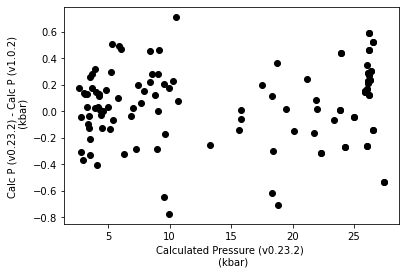

In [3]:
Import=pd.read_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')
plt.plot(Import['Cpx_Liq_Pressure_v023_2'],
         Import['Cpx_Liq_Pressure_v023_2']-Import['Cpx_Liq_Pressure_v102'], 
         'ok')
plt.xlabel('Calculated Pressure (v0.23.2) \n (kbar)')
plt.ylabel('Calc P (v0.23.2) - Calc P (v1.0.2) \n (kbar)')

## Cpx-liq Press using voting

In [4]:
pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                           equationP="P_Petrelli2020_Cpx_Liq")#.P_kbar_calc


,P_kbar_calc,Median_Trees,Std_Trees,IQR_Trees
0,2.860700,2.000000,2.865335,1.87500
1,3.421923,2.000000,3.428284,4.00000
2,3.236583,2.000000,3.089905,1.37550
3,9.041349,9.300000,4.209245,5.85725
4,10.029089,9.900000,4.569013,7.98000
...,...,...,...,...
114,3.198926,2.000000,3.483214,4.99900
115,3.254226,0.001013,4.788980,6.99900
116,5.572789,5.000000,5.230300,8.54500
117,23.671429,24.500000,5.326005,7.75000


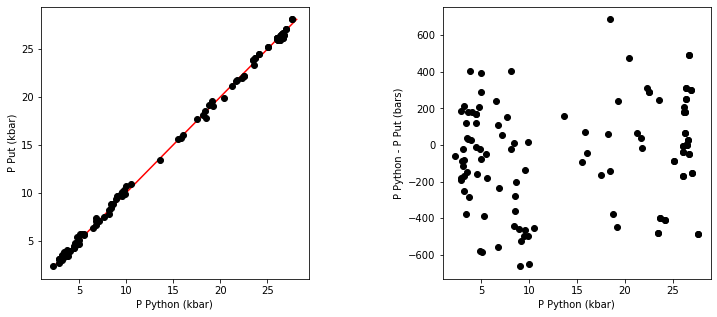

In [6]:
# Uses Temp from Talk1
P_Put=my_input['Cpx_Liq_Pressure_from_py']
P_py=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                                equationP="P_Petrelli2020_Cpx_Liq").P_kbar_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Cpx-Liq temp using voting

In [6]:
T_py=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                        equationT="T_Petrelli2020_Cpx_Liq_onnx")
T_py


NameError: name 'Petrelli2020_Cpx_Liq_Temp' is not defined

In [6]:
T_py=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                        equationT="T_Petrelli2020_Cpx_Liq")
T_py

        T_K_calc  Median_Trees  Std_Trees  IQR_Trees
0    1196.968182       1198.15  82.296049      63.00
1    1183.224545       1176.15  67.849780      63.00
2    1114.855455       1113.15  70.043055     117.00
3    1411.064545       1373.15  91.961958     140.00
4    1393.453636       1373.15  88.785608     100.00
..           ...           ...        ...        ...
114  1350.212727       1344.15  63.648725      40.00
115  1416.603636       1408.15  50.499371      27.00
116  1376.499091       1373.15  73.912878      65.00
117  1643.288182       1636.15  81.025804     128.75
118  1643.288182       1636.15  81.025804     128.75

[119 rows x 4 columns]


,T_K_calc,Median_Trees,Std_Trees,IQR_Trees
0,1196.968182,1198.15,82.296049,63.00
1,1183.224545,1176.15,67.849780,63.00
2,1114.855455,1113.15,70.043055,117.00
3,1411.064545,1373.15,91.961958,140.00
4,1393.453636,1373.15,88.785608,100.00
...,...,...,...,...
114,1350.212727,1344.15,63.648725,40.00
115,1416.603636,1408.15,50.499371,27.00
116,1376.499091,1373.15,73.912878,65.00
117,1643.288182,1636.15,81.025804,128.75


In [11]:
T_Put=my_input['Cpx_Liq_Temp_from_py'] 
T_py=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                        equationT="T_Petrelli2020_Cpx_Liq").T_K_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put (K)')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)


KeyError: 'T_K_calc'

## Cpx-only Pressure

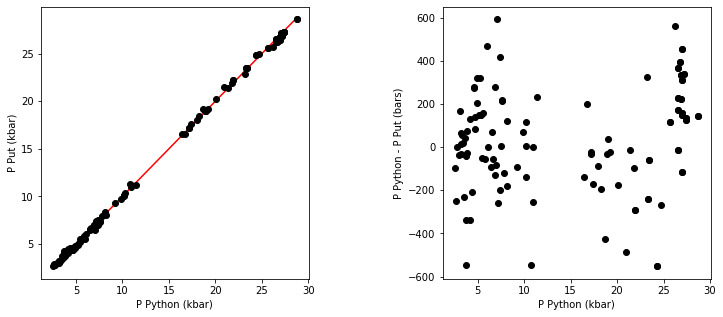

In [8]:
# Uses Temp from Talk1
P_Put=my_input['Cpx_only_Pressure_from_py']
P_py=pt.calculate_cpx_only_press(cpx_comps=Cpx_test,  equationP="P_Petrelli2020_Cpx_only").P_kbar_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)